In [26]:
import pandas
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from reader import generic_reader
import graphviz

In [27]:
danish_movies = generic_reader.read_csv_file_to_data_frame("../movie_data/danish_movies_upto_2024.csv")
print(danish_movies.info())
danish_movies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              931 non-null    bool   
 1   backdrop_path      491 non-null    object 
 2   genre_ids          931 non-null    object 
 3   id                 931 non-null    int64  
 4   original_language  931 non-null    object 
 5   original_title     931 non-null    object 
 6   overview           660 non-null    object 
 7   popularity         931 non-null    float64
 8   poster_path        830 non-null    object 
 9   release_date       931 non-null    object 
 10  title              931 non-null    object 
 11  video              931 non-null    bool   
 12  vote_average       931 non-null    float64
 13  vote_count         931 non-null    int64  
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 89.2+ KB
None


,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/xPPBElHCcNQ7H3aXdLptykKxyZ1.jpg,"[18, 36]",1232827,da,Pigen med nålen,"Struggling to survive in post-WWI Copenhagen, ...",7.8491,/2xkyx8v9G3ePxe1IcFugFQkXHzQ.jpg,2024-09-06,The Girl with the Needle,False,7.605,272
1,False,/vaHZNxg4hspIxVzT7Wl7VLwnWhX.jpg,"[18, 35]",1082462,da,Camino,A man takes his daughter on the Camino de Sant...,5.0817,/iPvyM9S9XA6l1Wd6J4AkcC4O5aa.jpg,2023-02-04,Camino,False,4.800,8
2,False,/sKBB1Fh9YMiLMsUUCPvdcbpVTfo.jpg,[18],960206,da,Vanskabte land,"In the late 19th century, a young Danish pries...",5.0933,/s0cWPhzpKJ4kspaleMcOduHBFBw.jpg,2022-12-01,Godland,False,6.900,178
3,False,/t90KM83WYtsAt8S4zdorFV7w5qV.jpg,"[18, 10752]",957176,da,De forbandede år 2,"This Danish movie ""Out of The Darkness"" ( in ...",4.0536,/owwNYUxjRwJdhjxCl6asIt0v9uV.jpg,2022-04-21,Out of the Darkness,False,7.200,21
4,False,/a2pPepVPtKY7E4XEkT7W3ZxUOY5.jpg,"[35, 18]",580175,da,Druk,Four stagnant high school teachers decide to t...,3.7817,/aDcIt4NHURLKnAEu7gow51Yd00Q.jpg,2020-09-24,Another Round,False,7.636,3533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,False,NaN,[],742862,da,"Forestillingen om ""VI""",Mille and Bertram are preparing for their enga...,0.0000,/4c5c6wxbgGTYj4bpWqZHDlziRXm.jpg,2020-09-14,"Forestillingen om ""VI""",False,0.000,0
927,False,NaN,[],716059,da,Morder Morten,Morten plans his first murder as a serial kill...,0.0000,NaN,2020-05-04,Morder Morten,False,0.000,0
928,False,NaN,[99],686990,da,Barnepigerne,When filmmaker Signe Barvil Stæhr was just fiv...,0.0000,/6H2v7Um87znVwqxc4RT603NmXkn.jpg,2020-03-18,The Nannies,False,0.000,0
929,False,/bHe84bL21hVqoW2oLrxmeP45I3y.jpg,[99],686876,da,Vi slås med sværd,"Real boys skinny-dip, fight with swords and le...",0.0000,/foS5VlcKEKofv2ImPfPpRAtmUnr.jpg,2020-03-18,Silence and Swords,False,1.000,1


In [28]:
list(danish_movies)

['adult',
 'backdrop_path',
 'genre_ids',
 'id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'release_date',
 'title',
 'video',
 'vote_average',
 'vote_count']

In [29]:
danish_movies.drop(columns=["adult", "backdrop_path", "original_language", "overview", "poster_path", "title", "video"], inplace=True)
print(danish_movies.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genre_ids       931 non-null    object 
 1   id              931 non-null    int64  
 2   original_title  931 non-null    object 
 3   popularity      931 non-null    float64
 4   release_date    931 non-null    object 
 5   vote_average    931 non-null    float64
 6   vote_count      931 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 51.0+ KB
None


In [30]:
print(danish_movies.describe().round(2))

               id  popularity  vote_average  vote_count
count      931.00      931.00        931.00      931.00
mean   1085771.78        0.45          2.90       12.56
std     229243.44        0.76          3.78      129.96
min     518245.00        0.00          0.00        0.00
25%     904371.00        0.02          0.00        0.00
50%    1098808.00        0.13          0.00        0.00
75%    1277304.00        0.59          6.30        1.00
max    1538508.00        7.85         10.00     3533.00


In [31]:
danish_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genre_ids       931 non-null    object 
 1   id              931 non-null    int64  
 2   original_title  931 non-null    object 
 3   popularity      931 non-null    float64
 4   release_date    931 non-null    object 
 5   vote_average    931 non-null    float64
 6   vote_count      931 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 51.0+ KB


In [32]:
danish_movies.isnull().sum()

genre_ids         0
id                0
original_title    0
popularity        0
release_date      0
vote_average      0
vote_count        0
dtype: int64

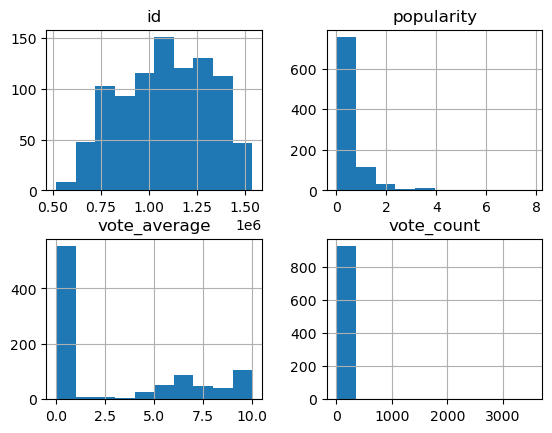

In [33]:
danish_movies.hist()
plt.show()